# This cell (#1) is my final code, 
## all that follows is my experiments to come up with it

<Figure size 1200x1000 with 0 Axes>

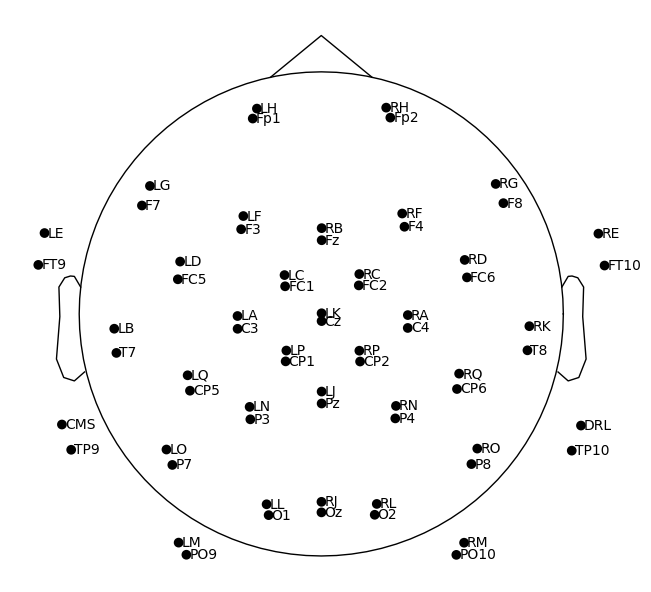

: 

In [147]:
import mne
import matplotlib.pyplot as plt

# Define the mapping of 10-20 names to EMOTIV names (flipped version)
standard_to_emotiv = {
    "TP9": ["CMS"],
    "TP10": ["DRL"],
    "C3": ["A"],
    "T7": ["B"],
    "FC1": ["C"],
    "FC5": ["D"],
    "FT9": ["E"],
    "F3": ["F"],
    "F7": ["G"],
    "Fp1": ["H"],
    "Pz": ["LJ"],  # Keep as it is, center electrode
    "Cz": ["LK"],  # Keep as it is, center electrode
    "O1": ["L"],
    "PO9": ["M"],
    "P3": ["N"],
    "P7": ["O"],
    "CP1": ["P"],
    "CP5": ["Q"],
    "C4": ["RA"],  # Keep as it is, center electrode
    "Fz": ["RB"],  # Keep as it is, center electrode
    "FC2": ["C"],
    "FC6": ["D"],
    "FT10": ["E"],
    "F4": ["F"],
    "F8": ["G"],
    "Fp2": ["H"],
    "Oz": ["RJ"],  # Keep as it is, center electrode
    "T8": ["K"],
    "O2": ["L"],
    "PO10": ["M"],
    "P4": ["N"],
    "P8": ["O"],
    "CP2": ["P"],
    "CP6": ["Q"]
}

# Create a standard montage and extract only the relevant positions
montage = mne.channels.make_standard_montage('standard_1020')

# Create a dictionary with the positions of only the relevant channels
ch_pos_standard = {standard: montage.get_positions()['ch_pos'][standard] 
                   for standard in standard_to_emotiv if standard in montage.get_positions()['ch_pos']}

# Create a dictionary for the EMOTIV channel positions
emotiv_to_1020 = {
    "CMS": "TP9",
    "DRL": "TP10",
    "LA": "C3",
    "LB": "T7",
    "LC": "FC1",
    "LD": "FC5",
    "LE": "FT9",
    "LF": "F3",
    "LG": "F7",
    "LH": "Fp1",
    "LJ": "Pz",
    "LK": "Cz",
    "LL": "O1",
    "LM": "PO9",
    "LN": "P3",
    "LO": "P7",
    "LP": "CP1",
    "LQ": "CP5",
    "RA": "C4",
    "RB": "Fz",
    "RC": "FC2",
    "RD": "FC6",
    "RE": "FT10",
    "RF": "F4",
    "RG": "F8",
    "RH": "Fp2",
    "RJ": "Oz",
    "RK": "T8",
    "RL": "O2",
    "RM": "PO10",
    "RN": "P4",
    "RO": "P8",
    "RP": "CP2",
    "RQ": "CP6"
}

# Create a dictionary for the positions of EMOTIV channels and offset them
offset = 0.01  # Offset in the Y direction
ch_pos_emotiv = {
    emotiv: (montage.get_positions()['ch_pos'][standard][0],
              montage.get_positions()['ch_pos'][standard][1] + offset,
              montage.get_positions()['ch_pos'][standard][2])
    for emotiv, standard in emotiv_to_1020.items() if standard in montage.get_positions()['ch_pos']
}

# Combine both channel positions into one dictionary for the custom montage
combined_ch_pos = {**ch_pos_standard, **ch_pos_emotiv}

# Create a custom montage with both standard and EMOTIV labels
combined_montage = mne.channels.make_dig_montage(combined_ch_pos, coord_frame='head')

# Create a larger figure
plt.figure(figsize=(12, 10))  # Width, Height in inches

# Plot the combined montage with both EMOTIV and standard labels
combined_montage.plot(show_names=True, sphere=(
    0.0,  # X offset
    0.0,  # Y Move head up (positive) or down (negative)
    0.07, # The larger this is, the larger the radius of the dots
    0.2   # Radius of head
))



# Show the plot
plt.show()


# Ignore following cells, unless only to satisfy your curiosity

C:\Users\Admin\AppData\Local\Temp\ipykernel_7588\1517595619.py:56: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  fig = custom_montage.plot(show_names=True, sphere=(


<Figure size 1200x1000 with 0 Axes>

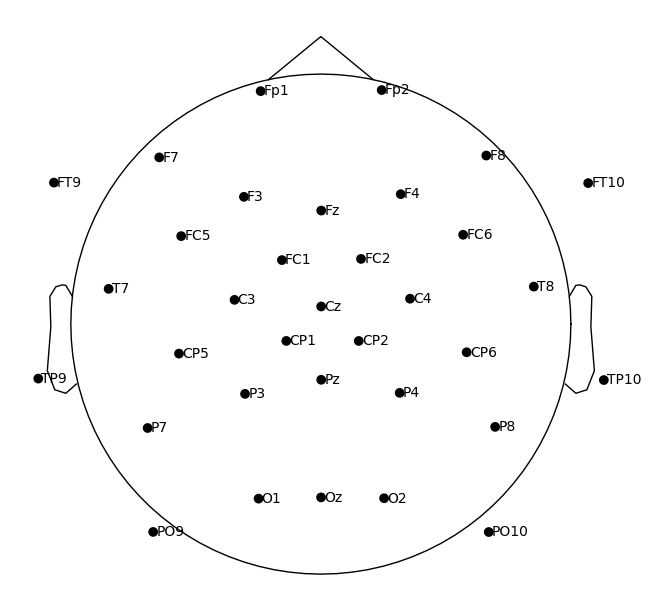

In [133]:
import mne
import matplotlib.pyplot as plt

# Define the mapping of 10-20 names to EMOTIV names (flipped version)
standard_to_emotiv = {
    "TP9": ["CMS"],
    "TP10": ["DRL"],
    "C3": ["A"],
    "T7": ["B"],
    "FC1": ["C"],
    "FC5": ["D"],
    "FT9": ["E"],
    "F3": ["F"],
    "F7": ["G"],
    "Fp1": ["H"],
    "Pz": ["LJ"],  # Keep as it is, center electrode
    "Cz": ["LK"],  # Keep as it is, center electrode
    "O1": ["L"],
    "PO9": ["M"],
    "P3": ["N"],
    "P7": ["O"],
    "CP1": ["P"],
    "CP5": ["Q"],
    "C4": ["RA"],  # Keep as it is, center electrode
    "Fz": ["RB"],  # Keep as it is, center electrode
    "FC2": ["C"],
    "FC6": ["D"],
    "FT10": ["E"],
    "F4": ["F"],
    "F8": ["G"],
    "Fp2": ["H"],
    "Oz": ["RJ"],  # Keep as it is, center electrode
    "T8": ["K"],
    "O2": ["L"],
    "PO10": ["M"],
    "P4": ["N"],
    "P8": ["O"],
    "CP2": ["P"],
    "CP6": ["Q"]
}

# Create a standard montage and extract only the relevant positions
montage = mne.channels.make_standard_montage('standard_1020')

# Create a dictionary with the positions of only the relevant channels
ch_pos = {standard: montage.get_positions()['ch_pos'][standard] 
          for standard in standard_to_emotiv if standard in montage.get_positions()['ch_pos']}

# Create a custom montage with these selected channels
custom_montage = mne.channels.make_dig_montage(ch_pos)

# Create a larger figure
plt.figure(figsize=(12, 10))  # Width, Height in inches

# Plot the custom montage
fig = custom_montage.plot(show_names=True, sphere=(
    0.0, #X offset
    -0.03, #Y Move head up (positive) or down (negative)
    0.07, # The larger this is, the larger the radius of the dots
    0.2)) # Radius of head



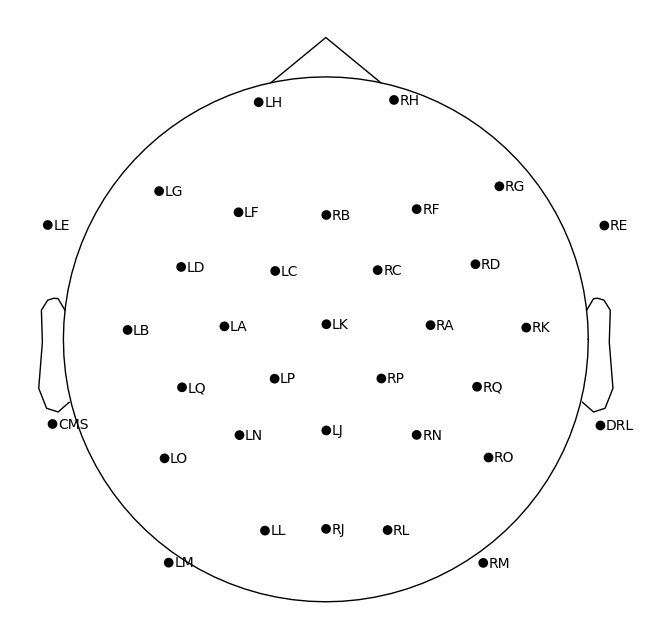

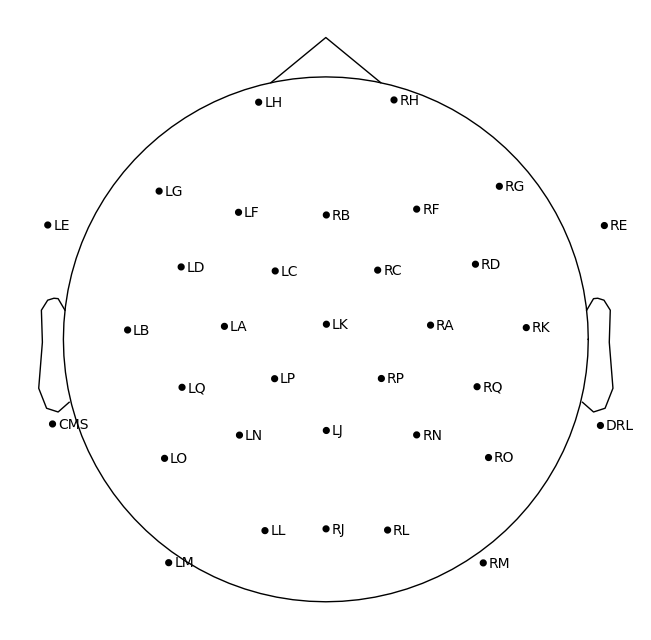

In [136]:
import mne

# Define the mapping of EMOTIV names to 10-20 names
emotiv_to_1020 = {
    "CMS": "TP9",
    "DRL": "TP10",
    "LA": "C3",
    "LB": "T7",
    "LC": "FC1",
    "LD": "FC5",
    "LE": "FT9",
    "LF": "F3",
    "LG": "F7",
    "LH": "Fp1",
    "LJ": "Pz",
    "LK": "Cz",
    "LL": "O1",
    "LM": "PO9",
    "LN": "P3",
    "LO": "P7",
    "LP": "CP1",
    "LQ": "CP5",
    "RA": "C4",
    "RB": "Fz",
    "RC": "FC2",
    "RD": "FC6",
    "RE": "FT10",
    "RF": "F4",
    "RG": "F8",
    "RH": "Fp2",
    "RJ": "Oz",
    "RK": "T8",
    "RL": "O2",
    "RM": "PO10",
    "RN": "P4",
    "RO": "P8",
    "RP": "CP2",
    "RQ": "CP6"
}

# Create a standard montage
montage = mne.channels.make_standard_montage('standard_1020')

# Create a dictionary with the positions of only the relevant channels
ch_pos = {emotiv: montage.get_positions()['ch_pos'][standard] 
          for emotiv, standard in emotiv_to_1020.items() if standard in montage.get_positions()['ch_pos']}

# Create a custom montage with the EMOTIV labels
custom_montage = mne.channels.make_dig_montage(ch_pos, coord_frame='head')

# Plot the custom montage directly using MNE's plotting function
custom_montage.plot(
    show_names=True, 
    sphere=(
        0,
        -0.02, 
        0, 
        0.12
        ))


C:\Users\Admin\AppData\Local\Temp\ipykernel_7588\1198539727.py:56: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  custom_montage.plot(show_names=True, sphere=(


<Figure size 1200x1000 with 0 Axes>

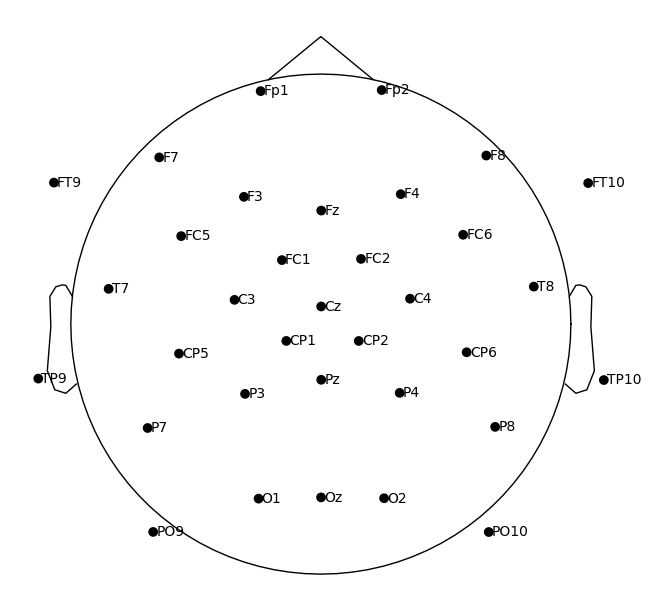

<Figure size 1200x1000 with 0 Axes>

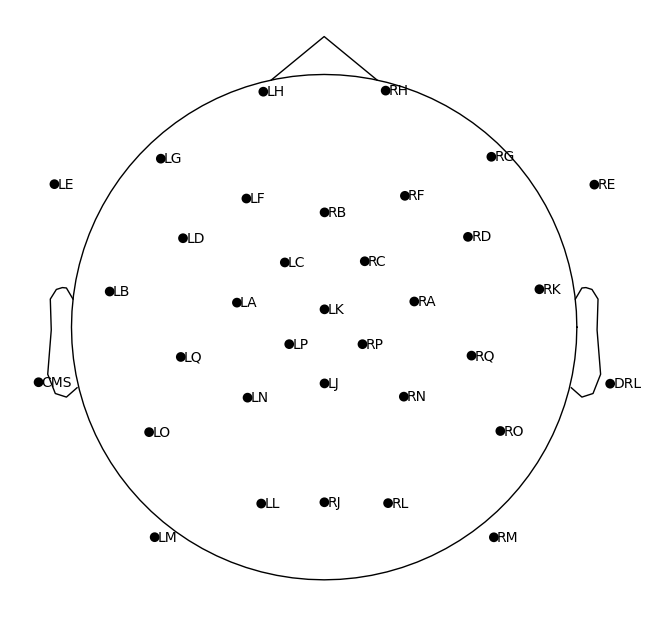

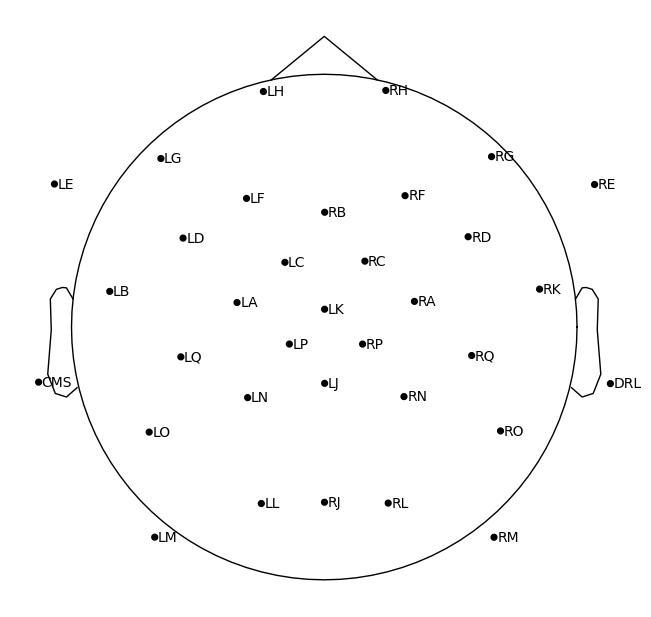

In [143]:
import mne
import matplotlib.pyplot as plt

# Define the mapping of 10-20 names to EMOTIV names (flipped version)
standard_to_emotiv = {
    "TP9": ["CMS"],
    "TP10": ["DRL"],
    "C3": ["A"],
    "T7": ["B"],
    "FC1": ["C"],
    "FC5": ["D"],
    "FT9": ["E"],
    "F3": ["F"],
    "F7": ["G"],
    "Fp1": ["H"],
    "Pz": ["LJ"],  # Keep as it is, center electrode
    "Cz": ["LK"],  # Keep as it is, center electrode
    "O1": ["L"],
    "PO9": ["M"],
    "P3": ["N"],
    "P7": ["O"],
    "CP1": ["P"],
    "CP5": ["Q"],
    "C4": ["RA"],  # Keep as it is, center electrode
    "Fz": ["RB"],  # Keep as it is, center electrode
    "FC2": ["C"],
    "FC6": ["D"],
    "FT10": ["E"],
    "F4": ["F"],
    "F8": ["G"],
    "Fp2": ["H"],
    "Oz": ["RJ"],  # Keep as it is, center electrode
    "T8": ["K"],
    "O2": ["L"],
    "PO10": ["M"],
    "P4": ["N"],
    "P8": ["O"],
    "CP2": ["P"],
    "CP6": ["Q"]
}

# Create a standard montage and extract only the relevant positions
montage = mne.channels.make_standard_montage('standard_1020')

# Create a dictionary with the positions of only the relevant channels
ch_pos = {standard: montage.get_positions()['ch_pos'][standard] 
          for standard in standard_to_emotiv if standard in montage.get_positions()['ch_pos']}

# Create a custom montage with these selected channels
custom_montage = mne.channels.make_dig_montage(ch_pos)

# Create a larger figure
plt.figure(figsize=(12, 10))  # Width, Height in inches

# Plot the custom montage
custom_montage.plot(show_names=True, sphere=(
    0.0,    # X offset
    -0.03,  # Y Move head up (positive) or down (negative)
    0.07,   # The larger this is, the larger the radius of the dots
    0.2     # Radius of head
))

# Now plot the EMOTIV labels
# Define the mapping of EMOTIV names to 10-20 names
emotiv_to_1020 = {
    "CMS": "TP9",
    "DRL": "TP10",
    "LA": "C3",
    "LB": "T7",
    "LC": "FC1",
    "LD": "FC5",
    "LE": "FT9",
    "LF": "F3",
    "LG": "F7",
    "LH": "Fp1",
    "LJ": "Pz",
    "LK": "Cz",
    "LL": "O1",
    "LM": "PO9",
    "LN": "P3",
    "LO": "P7",
    "LP": "CP1",
    "LQ": "CP5",
    "RA": "C4",
    "RB": "Fz",
    "RC": "FC2",
    "RD": "FC6",
    "RE": "FT10",
    "RF": "F4",
    "RG": "F8",
    "RH": "Fp2",
    "RJ": "Oz",
    "RK": "T8",
    "RL": "O2",
    "RM": "PO10",
    "RN": "P4",
    "RO": "P8",
    "RP": "CP2",
    "RQ": "CP6"
}

# Create a dictionary with the positions of only the relevant channels for EMOTIV
ch_pos_emotiv = {emotiv: montage.get_positions()['ch_pos'][standard] 
                 for emotiv, standard in emotiv_to_1020.items() if standard in montage.get_positions()['ch_pos']}

# Create a custom montage with the EMOTIV labels
custom_montage_emotiv = mne.channels.make_dig_montage(ch_pos_emotiv, coord_frame='head')

# Create a larger figure for EMOTIV labels
plt.figure(figsize=(12, 10))  # Width, Height in inches

# Plot the custom montage with EMOTIV labels
custom_montage_emotiv.plot(show_names=True, sphere=(
    0.0,    # X offset
    -0.03,  # Y Move head up (positive) or down (negative)
    0.07,   # The larger this is, the larger the radius of the dots
    0.2     # Radius of head
))

# Don't include plt.title() or plt.show() to avoid additional outputs


<Figure size 1200x1000 with 0 Axes>

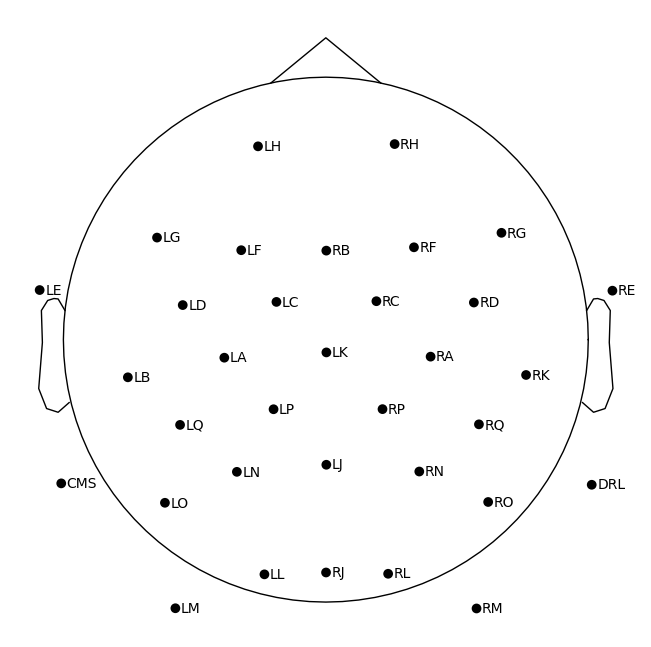

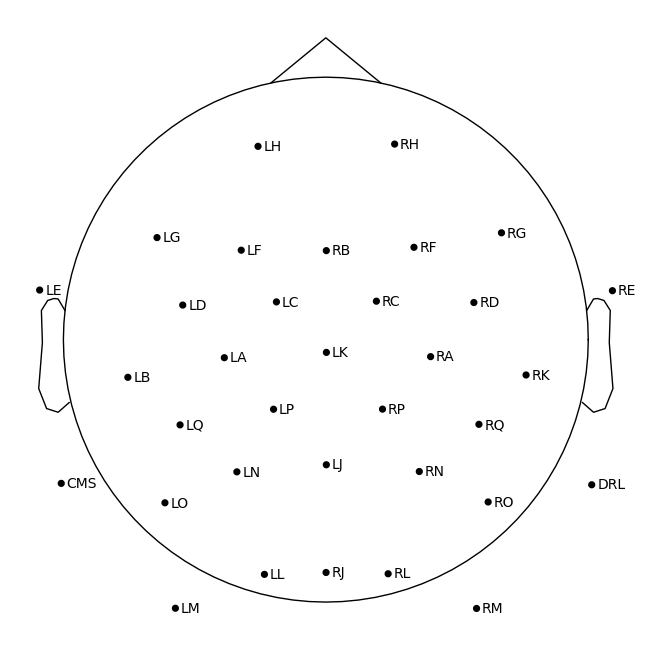

In [140]:
import mne
import matplotlib.pyplot as plt

# Define the mapping of EMOTIV names to 10-20 names
emotiv_to_1020 = {
    "CMS": "TP9",
    "DRL": "TP10",
    "LA": "C3",
    "LB": "T7",
    "LC": "FC1",
    "LD": "FC5",
    "LE": "FT9",
    "LF": "F3",
    "LG": "F7",
    "LH": "Fp1",
    "LJ": "Pz",
    "LK": "Cz",
    "LL": "O1",
    "LM": "PO9",
    "LN": "P3",
    "LO": "P7",
    "LP": "CP1",
    "LQ": "CP5",
    "RA": "C4",
    "RB": "Fz",
    "RC": "FC2",
    "RD": "FC6",
    "RE": "FT10",
    "RF": "F4",
    "RG": "F8",
    "RH": "Fp2",
    "RJ": "Oz",
    "RK": "T8",
    "RL": "O2",
    "RM": "PO10",
    "RN": "P4",
    "RO": "P8",
    "RP": "CP2",
    "RQ": "CP6"
}

# Create a standard montage
montage = mne.channels.make_standard_montage('standard_1020')

# Create a dictionary with the positions of only the relevant channels
ch_pos = {emotiv: montage.get_positions()['ch_pos'][standard] 
          for emotiv, standard in emotiv_to_1020.items() if standard in montage.get_positions()['ch_pos']}

# Create a custom montage with the EMOTIV labels
custom_montage = mne.channels.make_dig_montage(ch_pos, coord_frame='head')

# Create a larger figure
plt.figure(figsize=(12, 10))  # Width, Height in inches

# Plot the custom montage with EMOTIV labels
custom_montage.plot(
    show_names=True, 
    sphere=(0, 0, 0, 0.12)  # Radius of head
)

# Don't include plt.title() or plt.show() to avoid additional outputs


Lets plot only the 2nd letter for ones clearly left or right

C:\Users\Admin\AppData\Local\Temp\ipykernel_7588\654829359.py:56: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  fig = custom_montage.plot(show_names=True)#, sphere=(


<Figure size 1200x1000 with 0 Axes>

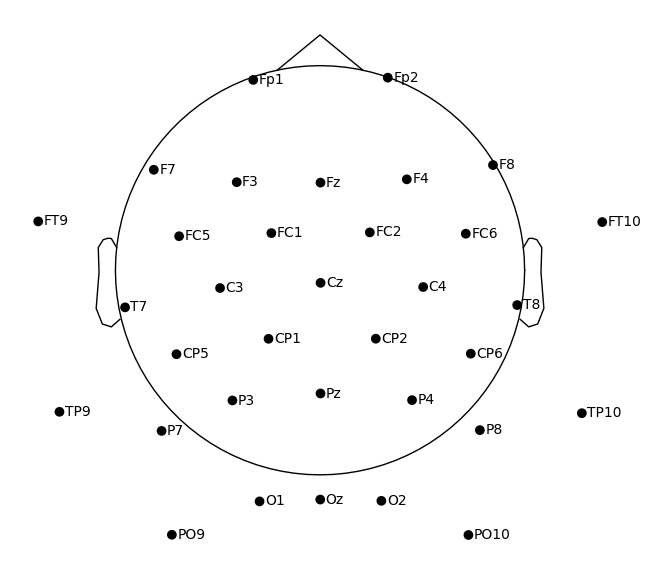

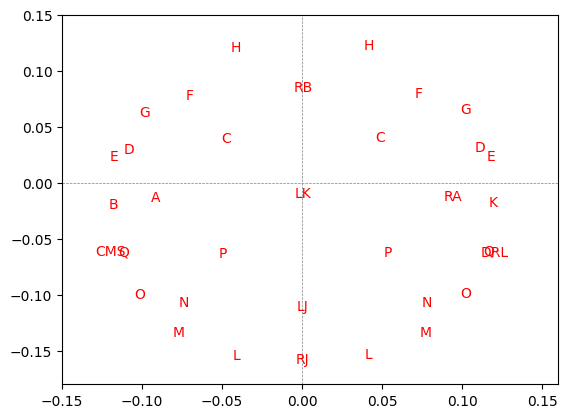

In [104]:
import mne
import matplotlib.pyplot as plt

# Define the mapping of 10-20 names to EMOTIV names (flipped version)
standard_to_emotiv = {
    "TP9": ["CMS"],
    "TP10": ["DRL"],
    "C3": ["A"],
    "T7": ["B"],
    "FC1": ["C"],
    "FC5": ["D"],
    "FT9": ["E"],
    "F3": ["F"],
    "F7": ["G"],
    "Fp1": ["H"],
    "Pz": ["LJ"],  # Keep as it is, center electrode
    "Cz": ["LK"],  # Keep as it is, center electrode
    "O1": ["L"],
    "PO9": ["M"],
    "P3": ["N"],
    "P7": ["O"],
    "CP1": ["P"],
    "CP5": ["Q"],
    "C4": ["RA"],  # Keep as it is, center electrode
    "Fz": ["RB"],  # Keep as it is, center electrode
    "FC2": ["C"],
    "FC6": ["D"],
    "FT10": ["E"],
    "F4": ["F"],
    "F8": ["G"],
    "Fp2": ["H"],
    "Oz": ["RJ"],  # Keep as it is, center electrode
    "T8": ["K"],
    "O2": ["L"],
    "PO10": ["M"],
    "P4": ["N"],
    "P8": ["O"],
    "CP2": ["P"],
    "CP6": ["Q"]
}

# Create a standard montage and extract only the relevant positions
montage = mne.channels.make_standard_montage('standard_1020')

# Create a dictionary with the positions of only the relevant channels
ch_pos = {standard: montage.get_positions()['ch_pos'][standard] 
          for standard in standard_to_emotiv if standard in montage.get_positions()['ch_pos']}

# Create a custom montage with these selected channels
custom_montage = mne.channels.make_dig_montage(ch_pos)

# Create a larger figure
plt.figure(figsize=(12, 10))  # Width, Height in inches

# Plot the custom montage
fig = custom_montage.plot(show_names=True)#, sphere=(
    # 0.0, #X offset
    # -0.03, #Y Move head up (positive) or down (negative)
    # 0.07, # The larger this is, the larger the radius of the dots
    # 0.2)) # Radius of head

# Add EMOTIV names to the plot at corresponding locations with increased spacing
for standard, emotiv_list in standard_to_emotiv.items():
    if standard in ch_pos:
        pos = ch_pos[standard]
        for i, emotiv in enumerate(emotiv_list):
            # Adjust the label positions to provide more spacing for each EMOTIV label
            offset = 0.02 * i  # Space the labels apart
            plt.text(pos[0] * 1.4, pos[1] * 1.4 + offset, emotiv, color='red', fontsize=10, ha='center')  # Scale position for spacing

# Set x and y limits to center the origin at (0, 0) with the desired range
plt.xlim(-0.15, 0.16)  # Adjust the bottom axis limit as requested
plt.ylim(-0.18, 0.15)  # Keep the range as requested

# Add grid and center lines for better visibility
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7588\1481049139.py:56: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  fig = custom_montage.plot(show_names=True, sphere=(


<Figure size 1200x1000 with 0 Axes>

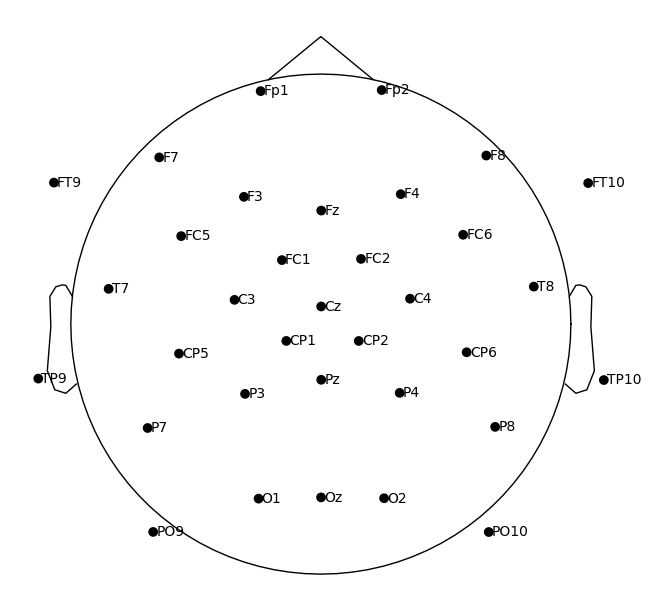

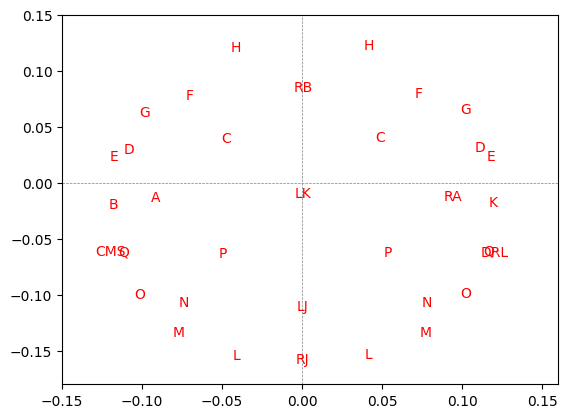

In [106]:
import mne
import matplotlib.pyplot as plt

# Define the mapping of 10-20 names to EMOTIV names (flipped version)
standard_to_emotiv = {
    "TP9": ["CMS"],
    "TP10": ["DRL"],
    "C3": ["A"],
    "T7": ["B"],
    "FC1": ["C"],
    "FC5": ["D"],
    "FT9": ["E"],
    "F3": ["F"],
    "F7": ["G"],
    "Fp1": ["H"],
    "Pz": ["LJ"],  # Keep as it is, center electrode
    "Cz": ["LK"],  # Keep as it is, center electrode
    "O1": ["L"],
    "PO9": ["M"],
    "P3": ["N"],
    "P7": ["O"],
    "CP1": ["P"],
    "CP5": ["Q"],
    "C4": ["RA"],  # Keep as it is, center electrode
    "Fz": ["RB"],  # Keep as it is, center electrode
    "FC2": ["C"],
    "FC6": ["D"],
    "FT10": ["E"],
    "F4": ["F"],
    "F8": ["G"],
    "Fp2": ["H"],
    "Oz": ["RJ"],  # Keep as it is, center electrode
    "T8": ["K"],
    "O2": ["L"],
    "PO10": ["M"],
    "P4": ["N"],
    "P8": ["O"],
    "CP2": ["P"],
    "CP6": ["Q"]
}

# Create a standard montage and extract only the relevant positions
montage = mne.channels.make_standard_montage('standard_1020')

# Create a dictionary with the positions of only the relevant channels
ch_pos = {standard: montage.get_positions()['ch_pos'][standard] 
          for standard in standard_to_emotiv if standard in montage.get_positions()['ch_pos']}

# Create a custom montage with these selected channels
custom_montage = mne.channels.make_dig_montage(ch_pos)

# Create a larger figure
plt.figure(figsize=(12, 10))  # Width, Height in inches

# Plot the custom montage
fig = custom_montage.plot(show_names=True, sphere=(
    0.0, #X offset
    -0.03, #Y Move head up (positive) or down (negative)
    0.07, # The larger this is, the larger the radius of the dots
    0.2)) # Radius of head

# Add EMOTIV names to the plot at corresponding locations with increased spacing
for standard, emotiv_list in standard_to_emotiv.items():
    if standard in ch_pos:
        pos = ch_pos[standard]
        for i, emotiv in enumerate(emotiv_list):
            # Adjust the label positions to provide more spacing for each EMOTIV label
            offset = 0.02 * i  # Space the labels apart
            plt.text(pos[0] * 1.4, pos[1] * 1.4 + offset, emotiv, color='red', fontsize=10, ha='center')  # Scale position for spacing

# Set x and y limits to center the origin at (0, 0) with the desired range
plt.xlim(-0.15, 0.16)  # Adjust the bottom axis limit as requested
plt.ylim(-0.18, 0.15)  # Keep the range as requested

# Add grid and center lines for better visibility
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')

plt.show()
